# House Sale Price Prediction
In this analysis, we aim to predict house sale prices using various features from the dataset. We have employed multiple preprocessing techniques, including feature engineering, ecoding, and scaling, to improve model performance.

**The data consists of: 81 columns x 1460 entires represents the features of every house.**

**Dataset Features:**

SalePrice - the property's sale price in dollars. This is the **target** variable that you're trying to predict.

MSSubClass: The building class

MSZoning: The general zoning classification

LotFrontage: Linear feet of street connected to property

LotArea: Lot size in square feet

Street: Type of road access

Alley: Type of alley access

LotShape: General shape of property

LandContour: Flatness of the property

Utilities: Type of utilities available

LotConfig: Lot configuration

LandSlope: Slope of property

Neighborhood: Physical locations within Ames city limits

Condition1: Proximity to main road or railroad

Condition2: Proximity to main road or railroad (if a second is present)

BldgType: Type of dwelling

HouseStyle: Style of dwelling

OverallQual: Overall material and finish quality

OverallCond: Overall condition rating

YearBuilt: Original construction date

YearRemodAdd: Remodel date

RoofStyle: Type of roof

RoofMatl: Roof material

Exterior1st: Exterior covering on house

Exterior2nd: Exterior covering on house (if more than one material)

MasVnrType: Masonry veneer type

MasVnrArea: Masonry veneer area in square feet

ExterQual: Exterior material quality

ExterCond: Present condition of the material on the exterior

Foundation: Type of foundation

BsmtQual: Height of the basement

BsmtCond: General condition of the basement

BsmtExposure: Walkout or garden level basement walls

BsmtFinType1: Quality of basement finished area

BsmtFinSF1: Type 1 finished square feet

BsmtFinType2: Quality of second finished area (if present)

BsmtFinSF2: Type 2 finished square feet

BsmtUnfSF: Unfinished square feet of basement area

TotalBsmtSF: Total square feet of basement area

Heating: Type of heating

HeatingQC: Heating quality and condition

CentralAir: Central air conditioning

Electrical: Electrical system

1stFlrSF: First Floor square feet

2ndFlrSF: Second floor square feet

LowQualFinSF: Low quality finished square feet (all floors)

GrLivArea: Above grade (ground) living area square feet

BsmtFullBath: Basement full bathrooms

BsmtHalfBath: Basement half bathrooms

FullBath: Full bathrooms above grade

HalfBath: Half baths above grade

Bedroom: Number of bedrooms above basement level

Kitchen: Number of kitchens

KitchenQual: Kitchen quality

TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)

Functional: Home functionality rating

Fireplaces: Number of fireplaces

FireplaceQu: Fireplace quality

GarageType: Garage location

GarageYrBlt: Year garage was built

GarageFinish: Interior finish of the garage

GarageCars: Size of garage in car capacity

GarageArea: Size of garage in square feet

GarageQual: Garage quality

GarageCond: Garage condition

PavedDrive: Paved driveway

WoodDeckSF: Wood deck area in square feet

OpenPorchSF: Open porch area in square feet

EnclosedPorch: Enclosed porch area in square feet

3SsnPorch: Three season porch area in square feet

ScreenPorch: Screen porch area in square feet

PoolArea: Pool area in square feet

PoolQC: Pool quality

Fence: Fence quality

MiscFeature: Miscellaneous feature not covered in other categories

MiscVal: $Value of miscellaneous feature

MoSold: Month Sold

YrSold: Year Sold

SaleType: Type of sale

SaleCondition: Condition of sale


## Business KPI


* What is the relation between features and Sale Price

* What is the relation between the features

* Which month has the highest sales

* Is the type of sale affect on the sale price





# Loading the Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import category_encoders as ce
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, PolynomialFeatures
from sklearn.impute import KNNImputer, SimpleImputer


In [84]:
df = pd.read_csv('C://Users//laphouse//Desktop//SIC_Training//house_price.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [1522]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
# Descriptive Statistics
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [43]:
df.describe(include='object')

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,...,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,...,870,605,1311,1326,1340,3,157,49,1267,1198


In [85]:
df.drop('Id', axis=1, inplace=True)

# EDA

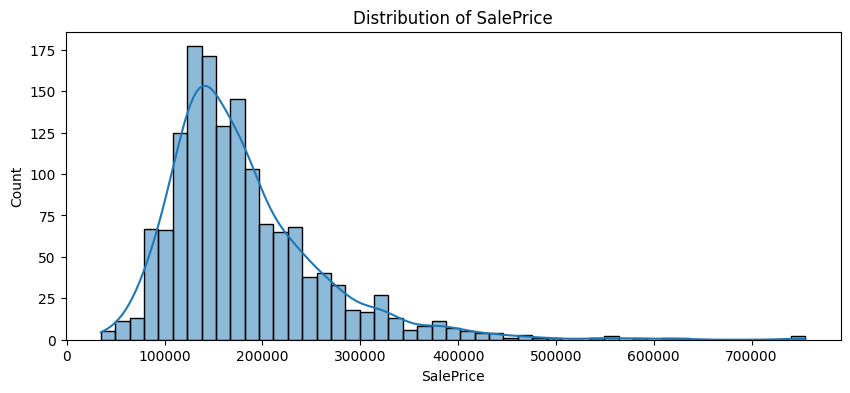

In [4]:
# Distribution of the target variable
plt.figure(figsize=(10, 4))
sns.histplot(df['SalePrice'], kde=True)
plt.title('Distribution of SalePrice')
plt.show()


The sale price feature is right skewed, most SalePrice between 100k to 300k

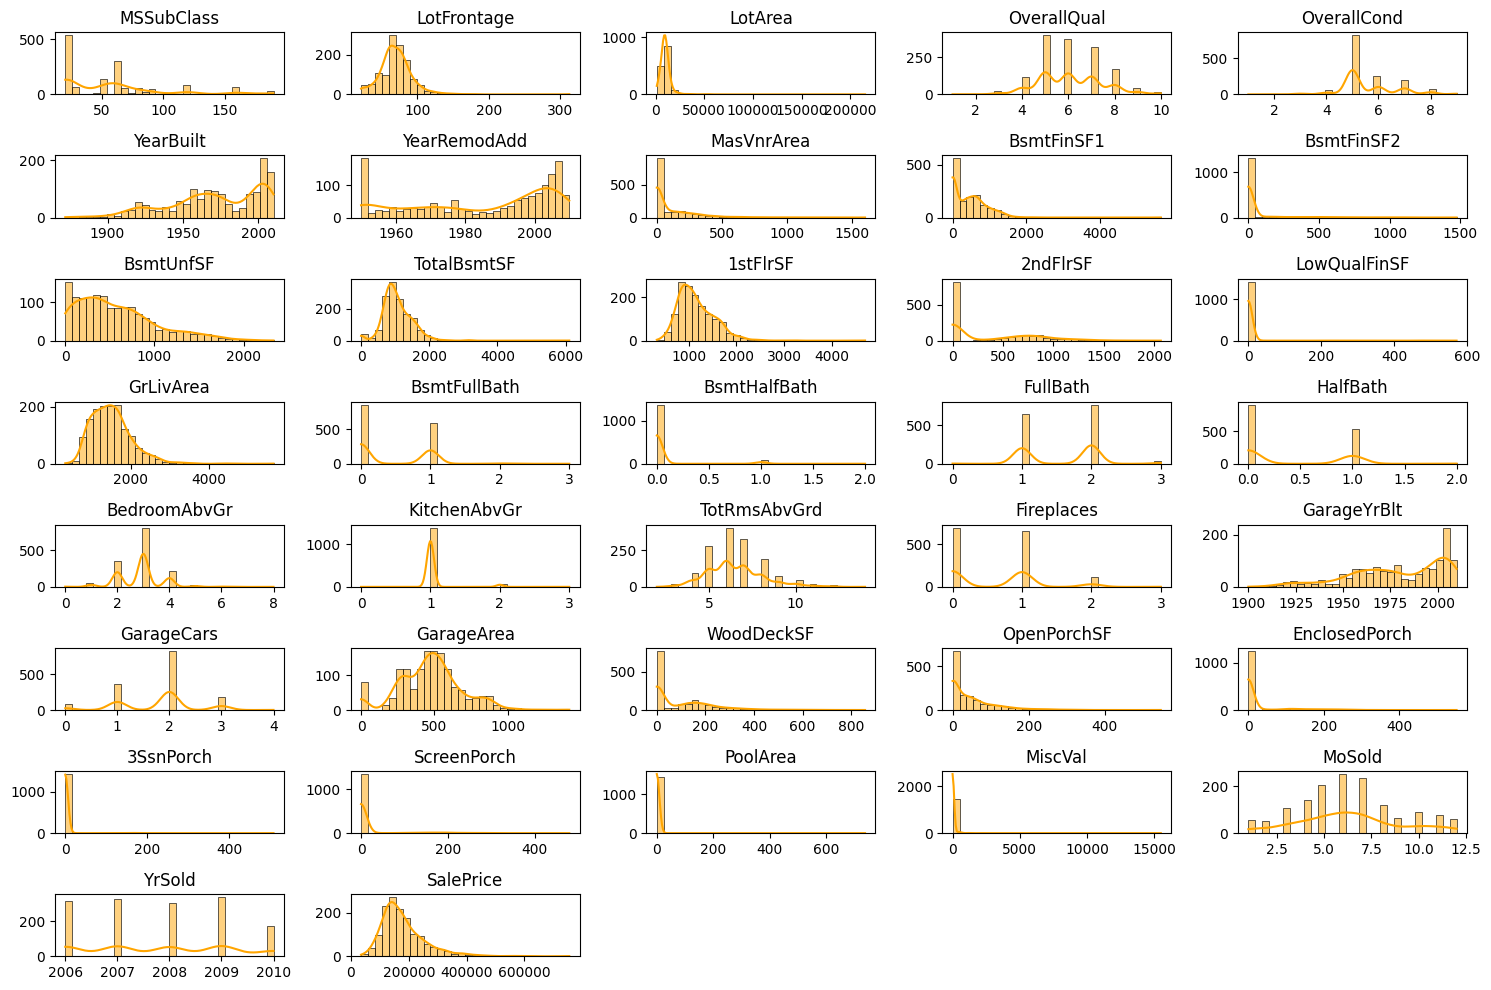

In [ ]:
numerical_features = df.select_dtypes(include=[np.number]).columns

plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features):
    plt.subplot(8, 5, i+1)
    sns.histplot(df[feature], kde=True, bins=30, color='orange')
    plt.title(feature)
    plt.xlabel('')
    plt.ylabel('')
plt.tight_layout()
plt.show()


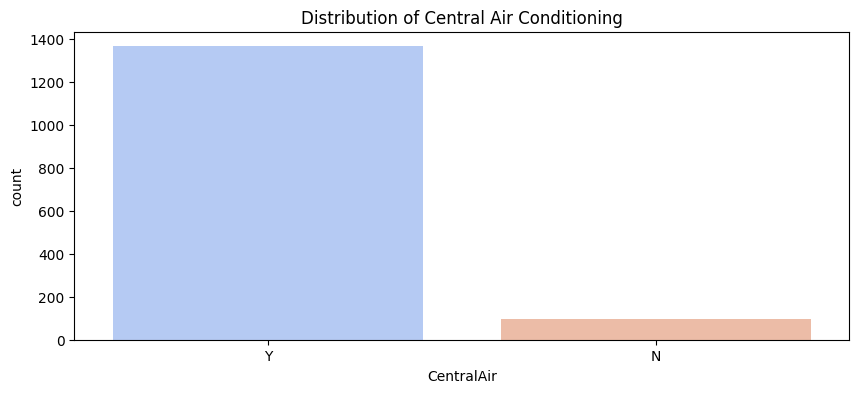

In [5]:
# Plot Central Air Conditioning
plt.figure(figsize=(10, 4))
sns.countplot(data=df, x='CentralAir', palette='coolwarm')
plt.title('Distribution of Central Air Conditioning')
plt.show()


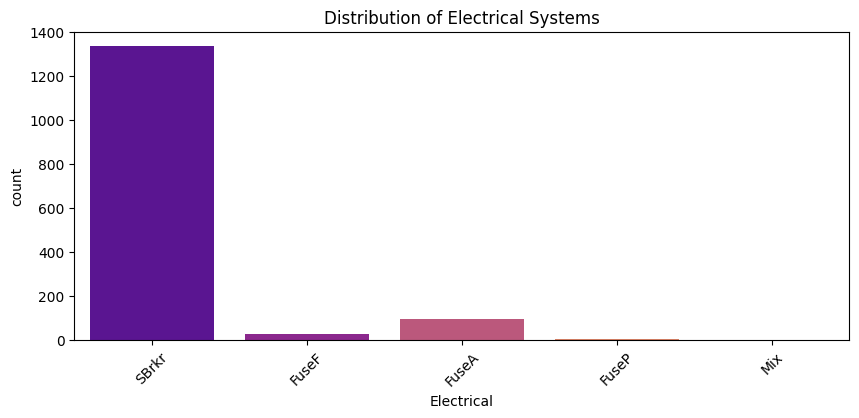

In [6]:
# Plot Electrical System
plt.figure(figsize=(10, 4))
sns.countplot(data=df, x='Electrical', palette='plasma')
plt.title('Distribution of Electrical Systems')
plt.xticks(rotation=45)
plt.show()

This countplot shows the most common electrical system among houses.

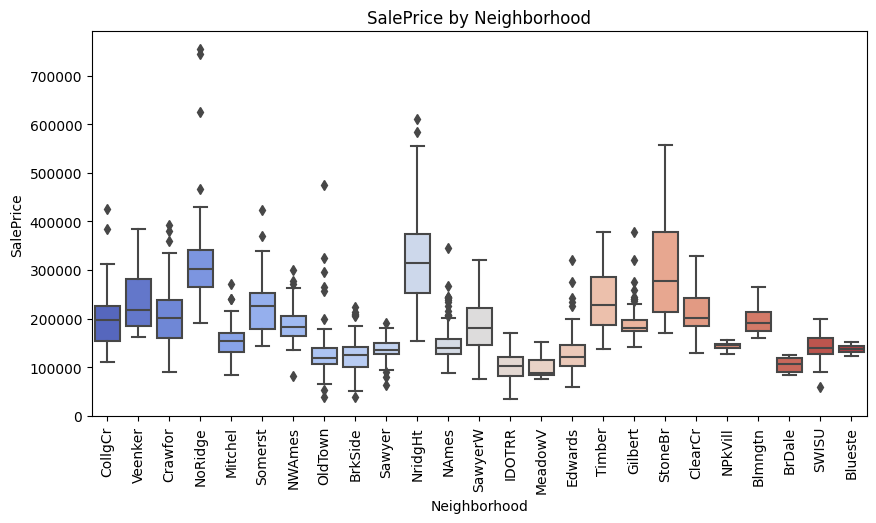

In [8]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='Neighborhood', y='SalePrice', data=df, palette='coolwarm')
plt.xticks(rotation=90)
plt.title('SalePrice by Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('SalePrice')
plt.show()


- This visualization allows us to see the distribution of sale prices across different neighborhoods. Some neighborhoods may have significantly higher median sale prices, indicating that location is a key factor in house pricing.
- Outliers in certain neighborhoods might also indicate areas where house prices deviate significantly from the normal.

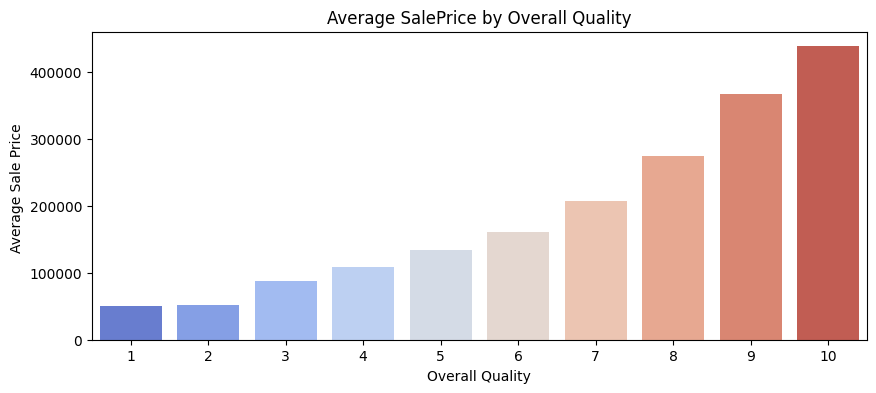

In [9]:
plt.figure(figsize=(10, 4))
sns.barplot(x='OverallQual', y='SalePrice', data=df, palette ='coolwarm', ci =None)
plt.title('Average SalePrice by Overall Quality')
plt.xlabel('Overall Quality')
plt.ylabel('Average Sale Price ')
plt.show()


This visualizeation shows the distribution of sale prices for different overall quality ratings. It allows for a deeper look into how the quality rating impacts sale price

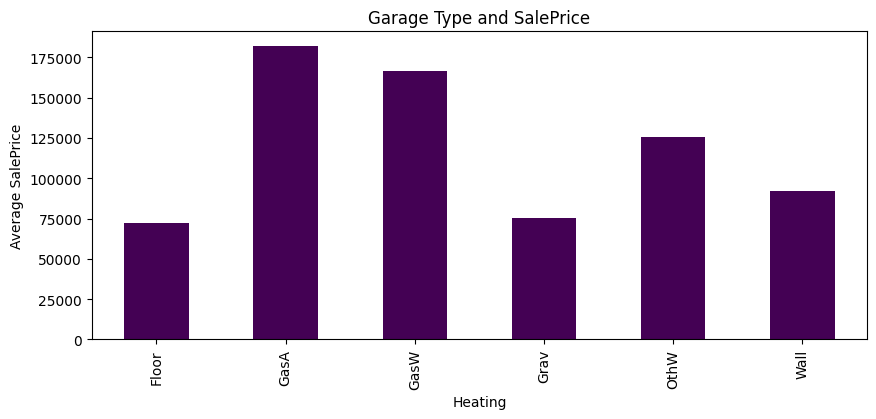

In [10]:
# Stacked Bar Chart of Garage Type and SalePrice
plt.figure(figsize=(10,4))
garage_saleprice = df.groupby('Heating')['SalePrice'].mean()
garage_saleprice.plot(kind='bar', colormap='viridis')
plt.title('Garage Type and SalePrice')
plt.ylabel('Average SalePrice')
plt.show()

This visualization show the impact of the Heating on the price.

Types: GasA and GasW are the highest SalePrice.

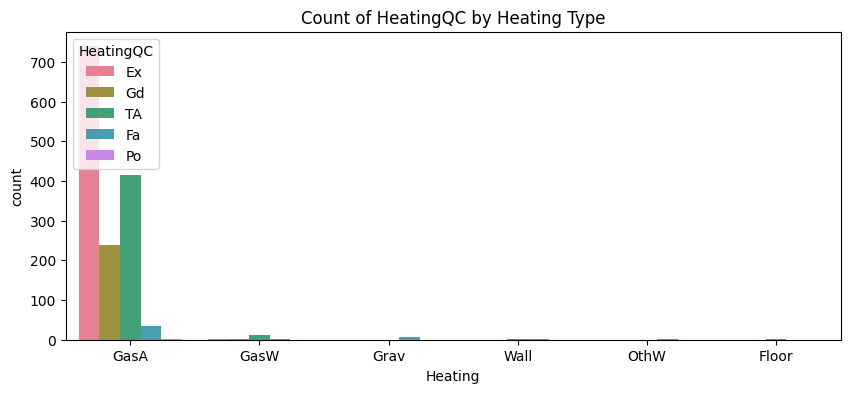

In [11]:
plt.figure(figsize=(10, 4))
sns.countplot(x='Heating', hue='HeatingQC', data=df, palette ='husl')
plt.title('Count of HeatingQC by Heating Type')
plt.show()


This visualization helps in understanding the relationship between the type of heating system used and its perceived quality.

<Figure size 1000x400 with 0 Axes>

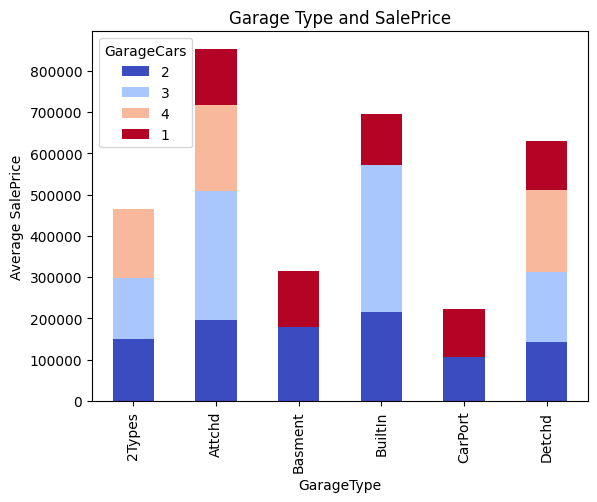

In [12]:
# Stacked Bar Chart of Garage Type and SalePrice
plt.figure(figsize=(10,4))
garage_saleprice = df.groupby(['GarageType', 'GarageCars'])['SalePrice'].mean().unstack()
garage_saleprice.plot(kind='bar', stacked=True, colormap='coolwarm')
plt.title('Garage Type and SalePrice')
plt.ylabel('Average SalePrice')
plt.show()

This shows how the type and size of the garage affect the sale price. As we see, homes with attached garages might consistently have higher prices, and the more cars a garage can accommodate, the higher the likely sale price.

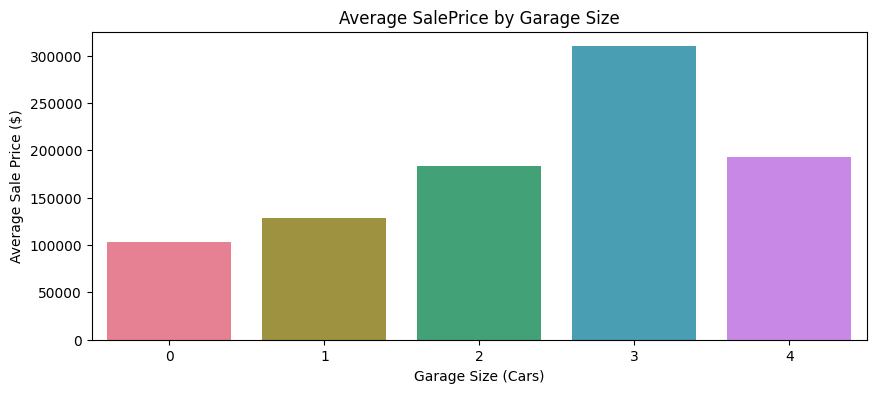

In [13]:
plt.figure(figsize=(10,4))
sns.barplot(x='GarageCars', y='SalePrice', data=df, ci=None, palette ='husl')
plt.title('Average SalePrice by Garage Size')
plt.xlabel('Garage Size (Cars)')
plt.ylabel('Average Sale Price ($)')
plt.show()


This bar plot highlights how garage size affects the house price, showing that homes with larger garages generally have higher sale prices.

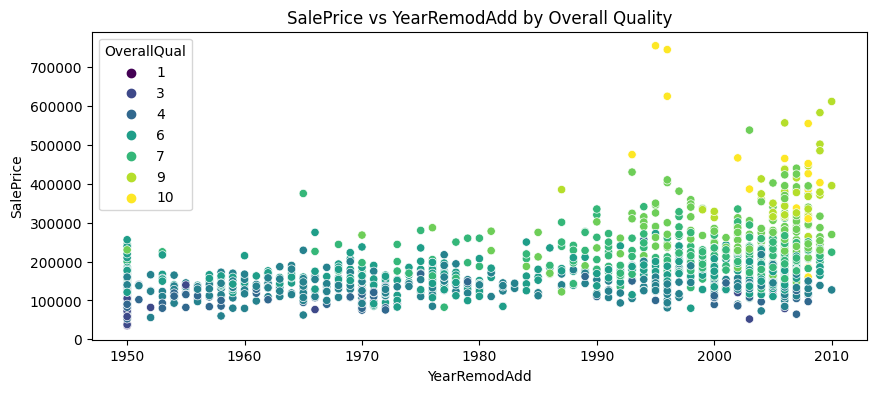

In [14]:
# Scatter Plot of SalePrice vs. YearRemodAdd with Color by OverallQual
plt.figure(figsize=(10, 4))
sns.scatterplot(x='YearRemodAdd', y='SalePrice', hue='OverallQual', palette='viridis', data=df)
plt.title('SalePrice vs YearRemodAdd by Overall Quality')
plt.show()

This can reveal how recent renovations correlate with sale price and how overall quality influences this relationship. Houses that were remodeled more recently and have high overall quality often command higher prices.

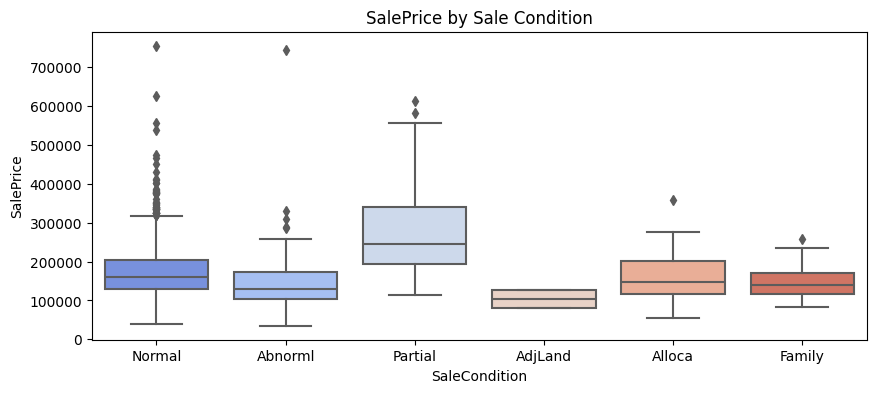

In [15]:
# Boxplot of SalePrice by SaleCondition
plt.figure(figsize=(10,4))
sns.boxplot(x='SaleCondition', y='SalePrice', data=df, palette ='coolwarm')
plt.title('SalePrice by Sale Condition')
plt.show()


This boxplot shows how different sale conditions impact the final sale price.

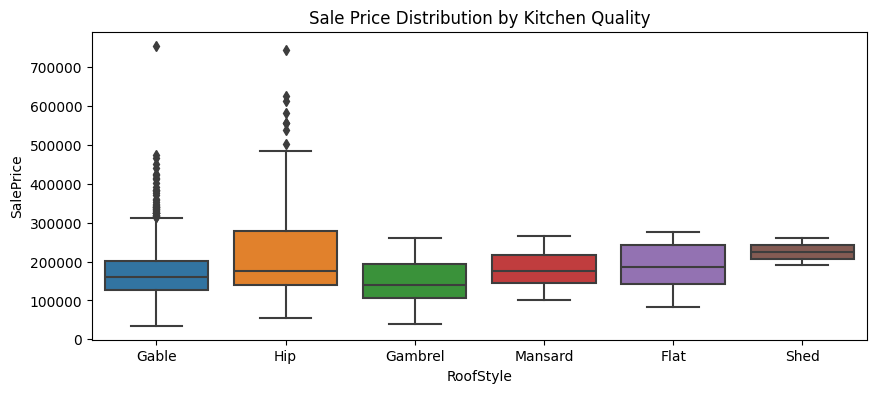

In [16]:
plt.figure(figsize=(10,4))
sns.boxplot(x='RoofStyle', y='SalePrice', data=df)
plt.title('Sale Price Distribution by Kitchen Quality')
plt.show()


This visualization can give an overall sense of the popularity of different roof styles in the housing market.

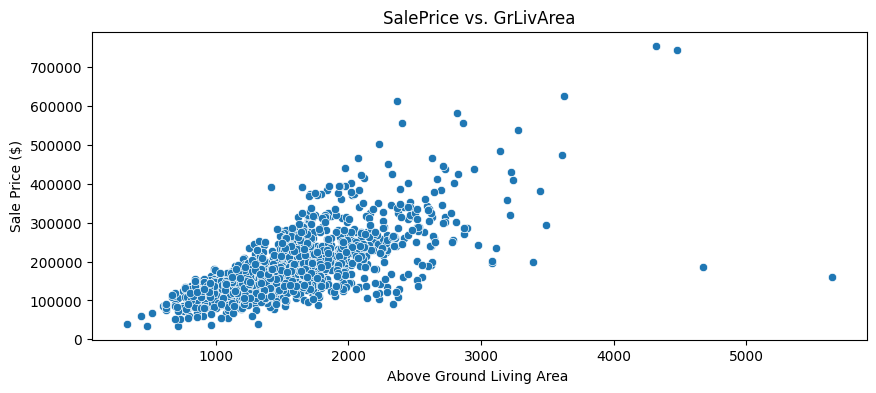

In [17]:
# Displaying the relationship between sale price and Ground living area
plt.figure(figsize=(10,4))
sns.scatterplot(x='GrLivArea', y='SalePrice', data=df)
plt.title('SalePrice vs. GrLivArea')
plt.xlabel('Above Ground Living Area ')
plt.ylabel('Sale Price ($)')
plt.show()


This scatter plot shows the realtionship between the living area and sale prices . it can give us insights into how the living area impacts the sale price. with a strong positive correlation indicating that it is a key factor of sale price.

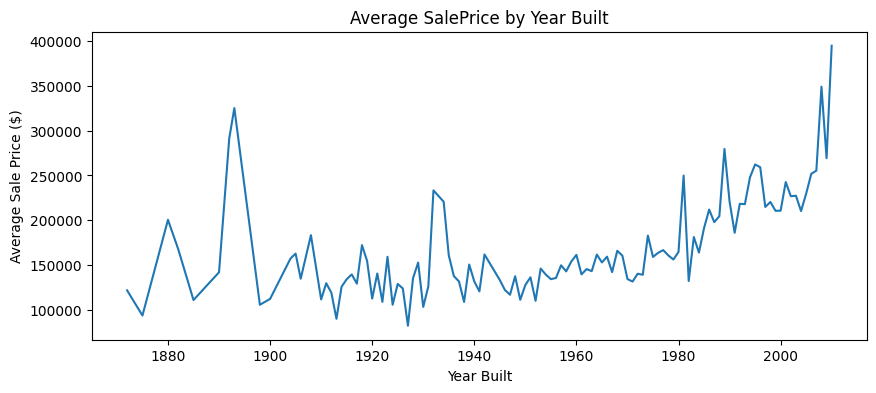

In [18]:
df.groupby('YearBuilt')['SalePrice'].mean().plot(kind='line', figsize=(10, 4))
plt.title('Average SalePrice by Year Built')
plt.xlabel('Year Built')
plt.ylabel('Average Sale Price ($)')
plt.show()


This line plot shows trends in house prices over time, revealing whether newer homes are typically more expensive.

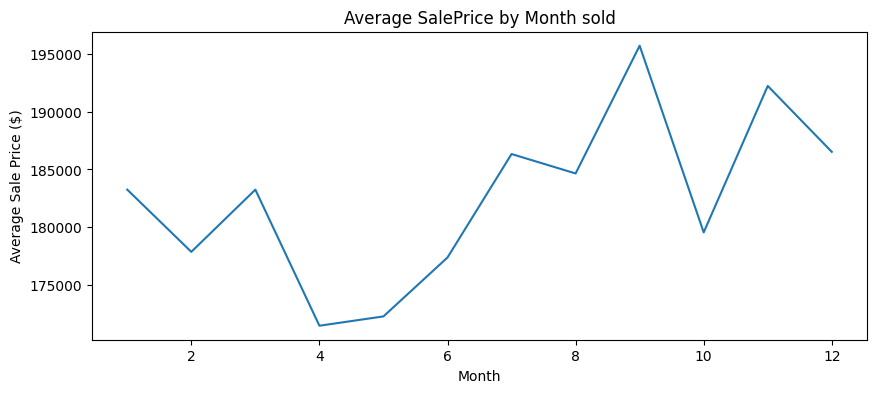

In [19]:
df.groupby('MoSold')['SalePrice'].mean().plot(kind='line', figsize=(10, 4))
plt.title('Average SalePrice by Month sold')
plt.xlabel('Month')
plt.ylabel('Average Sale Price ($)')
plt.show()


This plot represents the month when houses were sold. and shows how the average sale price of houses changes from month to month.

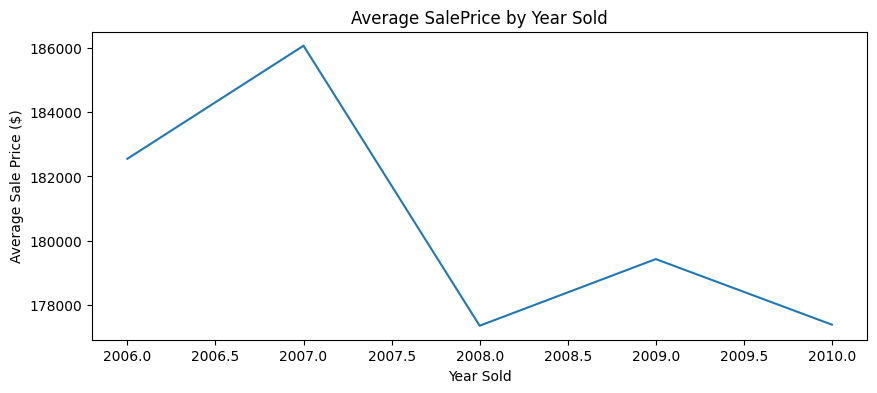

In [20]:
df.groupby('YrSold')['SalePrice'].mean().plot(kind='line', figsize=(10, 4))
plt.title('Average SalePrice by Year Sold')
plt.xlabel('Year Sold')
plt.ylabel('Average Sale Price ($)')
plt.show()


Like the previous plot, this represents the year when houses were sold.

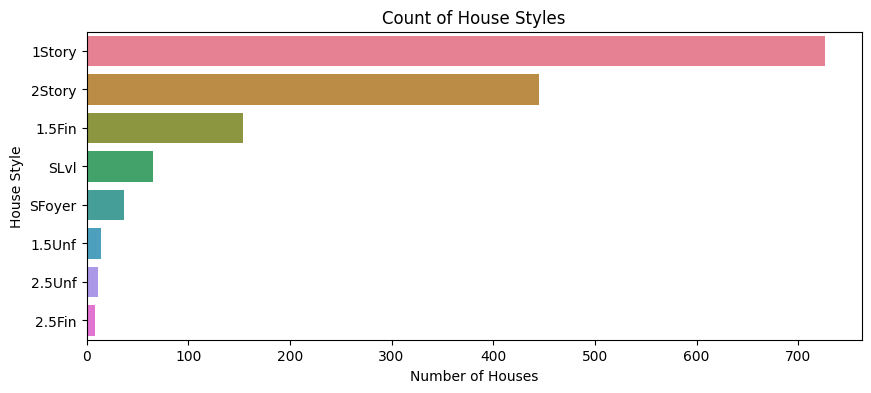

In [21]:
plt.figure(figsize=(10,4))
sns.countplot(y='HouseStyle', data=df, order=df['HouseStyle'].value_counts().index, palette ='husl')
plt.title('Count of House Styles')
plt.xlabel('Number of Houses')
plt.ylabel('House Style')
plt.show()


This provides a quick overview of the most common house styles in the dataset, which can be important for understanding trends.

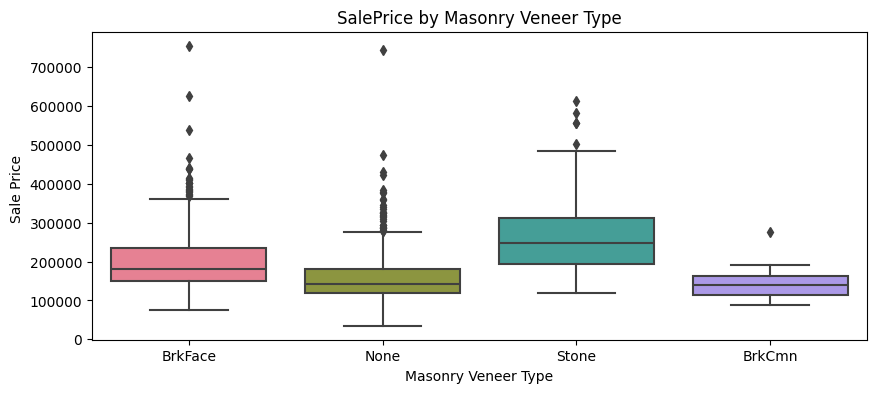

In [22]:
plt.figure(figsize=(10,4))
sns.boxplot(x='MasVnrType', y='SalePrice', data=df, palette ='husl')
plt.title('SalePrice by Masonry Veneer Type')
plt.xlabel('Masonry Veneer Type')
plt.ylabel('Sale Price ')
plt.show()


This visualization can help us see if different types of masonry veneer are associated with varying sale prices.


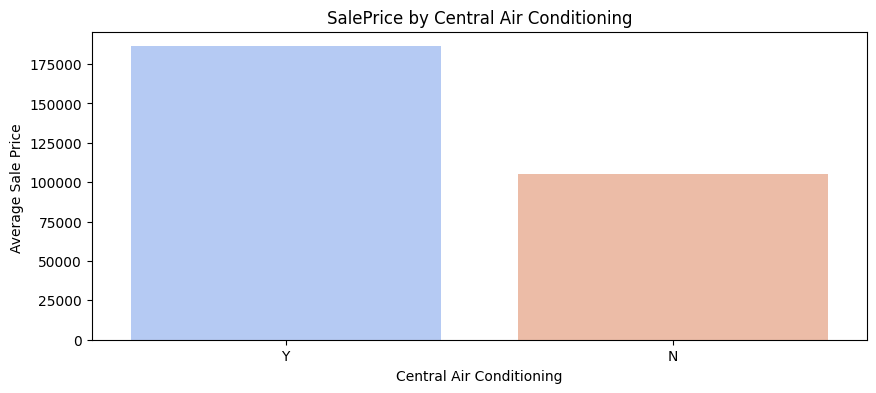

In [23]:
plt.figure(figsize=(10,4))
sns.barplot(x='CentralAir', y='SalePrice', data=df, palette ='coolwarm', ci =None)
plt.title('SalePrice by Central Air Conditioning')
plt.xlabel('Central Air Conditioning')
plt.ylabel('Average Sale Price ')
plt.show()


This plot helps assess whether central air conditioning significantly impacts sale prices.

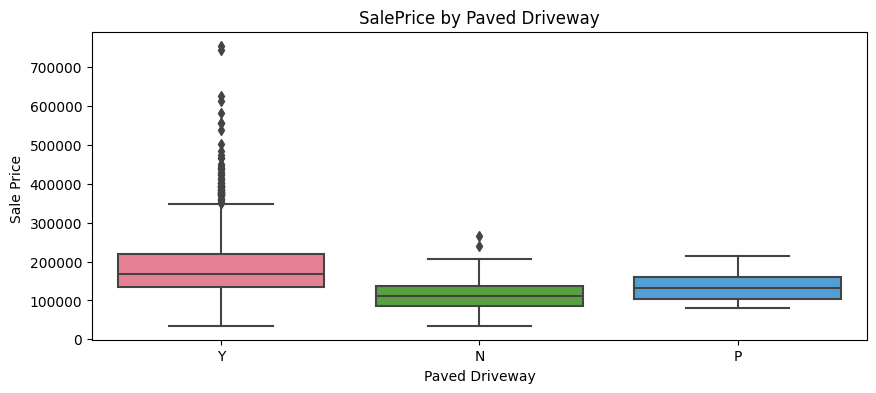

In [24]:
plt.figure(figsize=(10,4))
sns.boxplot(x='PavedDrive', y='SalePrice', data=df, palette='husl')
plt.title('SalePrice by Paved Driveway')
plt.xlabel('Paved Driveway')
plt.ylabel('Sale Price ')
plt.show()


This visualization can reveal whether having a paved driveway is associated with higher sale prices.

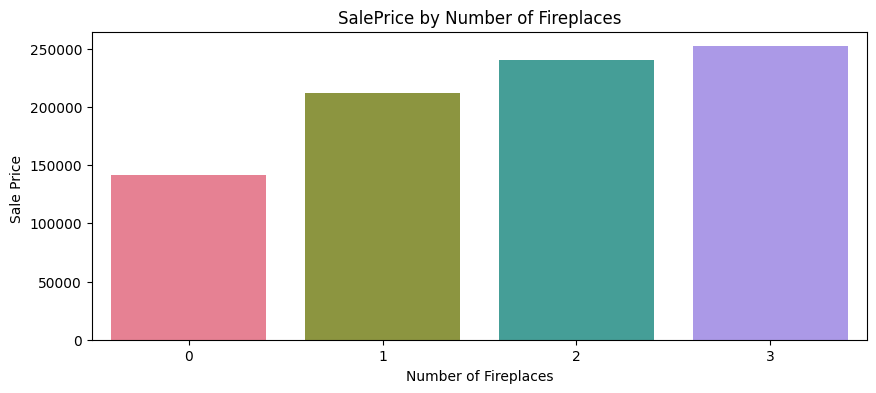

In [25]:
plt.figure(figsize=(10,4))
sns.barplot(x='Fireplaces', y='SalePrice', data=df, palette ='husl', ci =None)
plt.title('SalePrice by Number of Fireplaces')
plt.xlabel('Number of Fireplaces')
plt.ylabel('Sale Price ')
plt.show()


This plot helps us understand if more fireplaces correspond to higher sale prices.


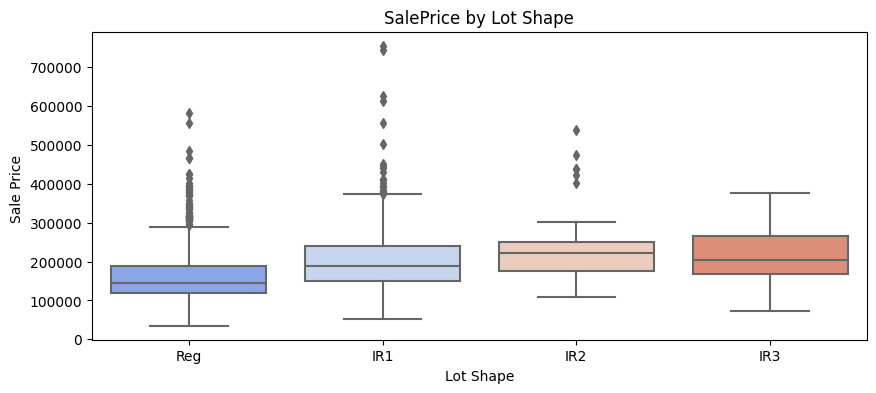

In [26]:
plt.figure(figsize=(10,4))
sns.boxplot(x='LotShape', y='SalePrice', data=df, palette ='coolwarm')
plt.title('SalePrice by Lot Shape')
plt.xlabel('Lot Shape')
plt.ylabel('Sale Price ')
plt.show()


This plot can indicate whether irregularly shaped lots have a different impact on sale price compared to regular ones.

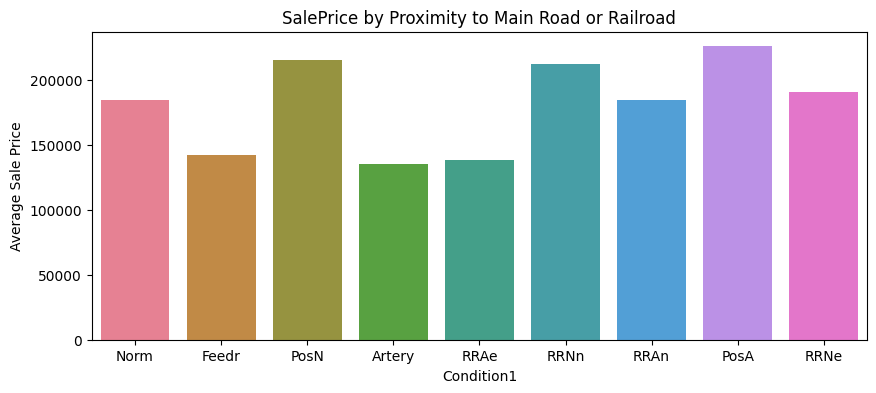

In [27]:
plt.figure(figsize=(10,4))
sns.barplot(x='Condition1', y='SalePrice', data=df, palette ='husl', ci =None)
plt.title('SalePrice by Proximity to Main Road or Railroad')
plt.xlabel('Condition1')
plt.ylabel('Average Sale Price')
plt.show()


This helps to see if proximity to a road or railroad affects the house price.

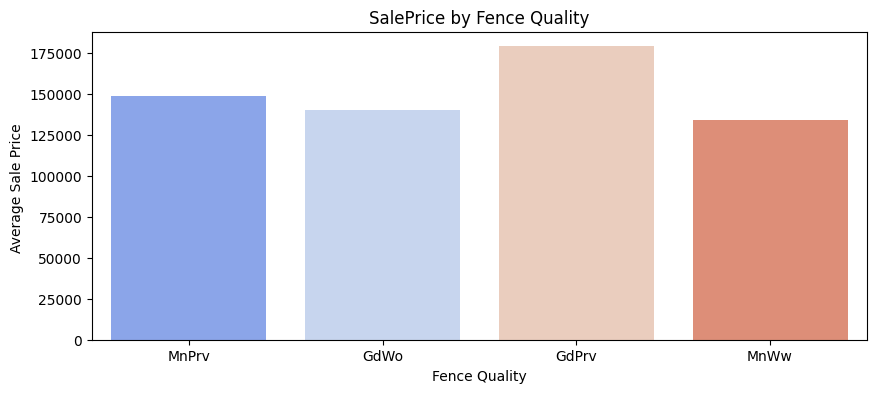

In [28]:
plt.figure(figsize=(10,4))
sns.barplot(x='Fence', y='SalePrice', data=df, palette ='coolwarm', ci =None)
plt.title('SalePrice by Fence Quality')
plt.xlabel('Fence Quality')
plt.ylabel('Average Sale Price ')
plt.show()


This visualization can reveal whether a higher quality fence is associated with higher sale prices.

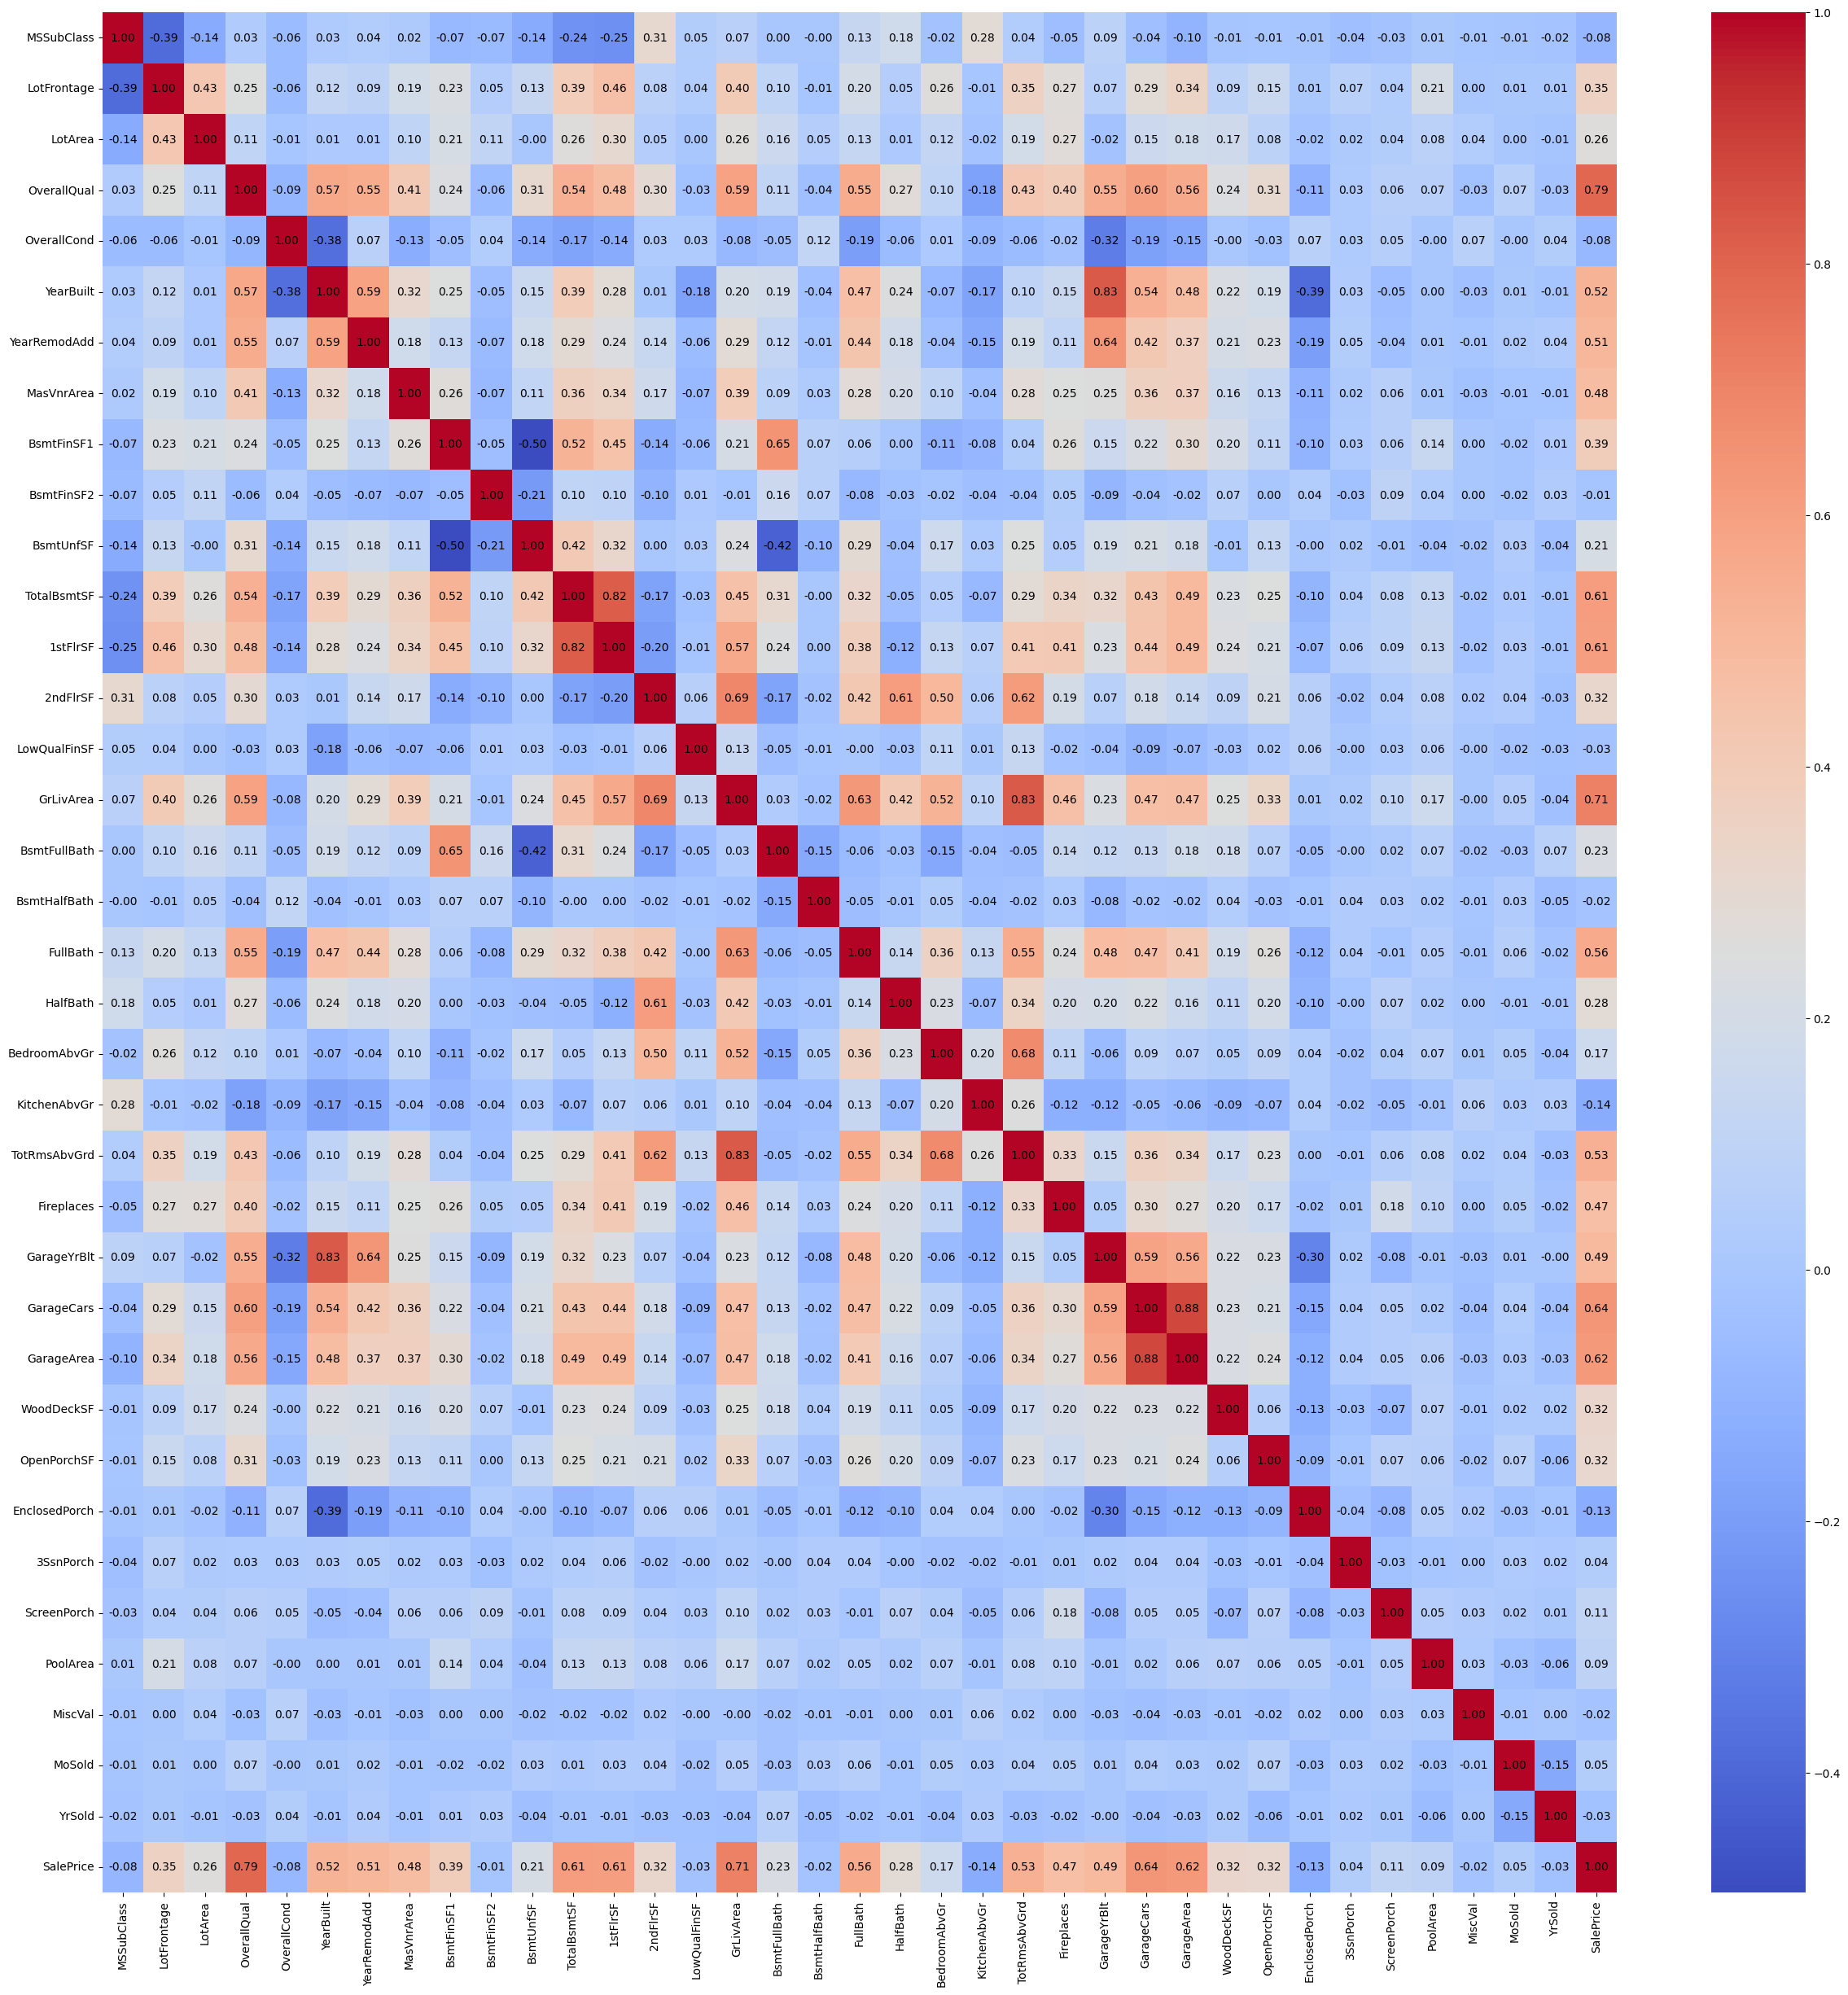

In [35]:
# Calculate the correlation matrix
corr = df.corr()

# Create a heatmap
plt.figure(figsize=(30, 30))
sns.heatmap(corr, annot=False, cmap='coolwarm', cbar=True)

# Annotate the heatmap with correlation values
for i in range(corr.shape[0]):
    for j in range(corr.shape[1]):
        plt.text(j + 0.5, i + 0.5, f'{corr.iloc[i, j]:.2f}',
                 ha='center', va='center', color='black')

# Show the plot
plt.show()

The heat map shows there multicolinearity, many columns with high correlation with others like==> (yearBuilt, GarageYrBlt), (TotRmsAbvGrd, GrlivArea), (GrlivArea, 2ndFlrSF)

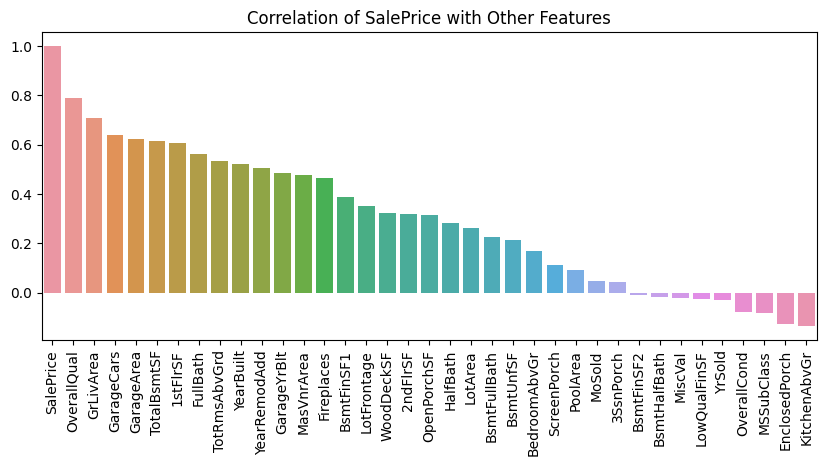

In [36]:
# Displaying the relationship between the target variable and other features
plt.figure(figsize=(10,4))
saleprice_corr = corr['SalePrice'].sort_values(ascending=False)
sns.barplot(x=saleprice_corr.index, y=saleprice_corr.values)
plt.xticks(rotation=90)
plt.title('Correlation of SalePrice with Other Features')
plt.show()

# Data Preprocessing

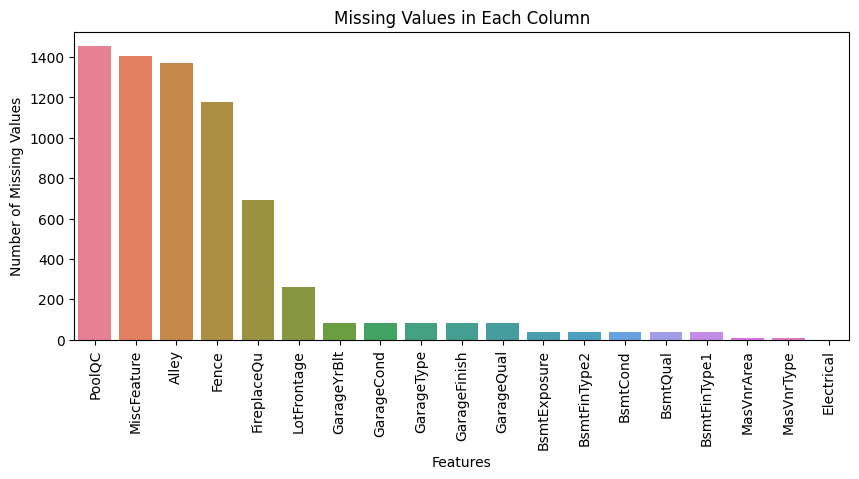

In [37]:
# Checking for missing values
missing_data = df.isnull().sum().sort_values(ascending=False)
missing_data = missing_data[missing_data > 0]

plt.figure(figsize=(10, 4))
sns.barplot(x=missing_data.index, y=missing_data.values, palette='husl')
plt.xticks(rotation=90)
plt.title('Missing Values in Each Column')
plt.xlabel('Features')
plt.ylabel('Number of Missing Values')
plt.show()


In [1533]:
df.isnull().sum()

MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 80, dtype: int64

In [86]:
# Checking for missing values
missing_data = df.isnull().sum()
missing_data = missing_data[missing_data > 0]
print("Missing values:\n", missing_data)

Missing values:
 LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


### Dropping the Missing columns

In [87]:
def drop_missing_columns(data, threshold=0.4):

    # Calculating the missing values percentage for each column
    ratio = data.isnull().mean()

    # Filtering columns with missing percentage greater than the threshold
    columns_to_drop = ratio[ratio > threshold].index

    # Dropping the identified columns
    data = data.drop(columns=columns_to_drop)

    return data

df_cleaned = drop_missing_columns(df, threshold=0.4)


In [88]:
# Checking for missing values that need handling
missing_values = df_cleaned.isnull().sum()
missing_values = missing_values[missing_values > 0]
print("Missing values:\n", missing_values)

Missing values:
 LotFrontage     259
MasVnrType        8
MasVnrArea        8
BsmtQual         37
BsmtCond         37
BsmtExposure     38
BsmtFinType1     37
BsmtFinType2     38
Electrical        1
GarageType       81
GarageYrBlt      81
GarageFinish     81
GarageQual       81
GarageCond       81
dtype: int64


### Checking for Linearity & Nonliearity

In [74]:
# Selecting only numerical features
numerical_features = df_cleaned.select_dtypes(include=['float64', 'int64']).columns

print("Numerical features:", numerical_features)


Numerical features: Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')


# Checking for colinearity
plt.figure(figsize=(30,30))
sns.pairplot(data_cleaned, diag_kind='kde')
plt.show()


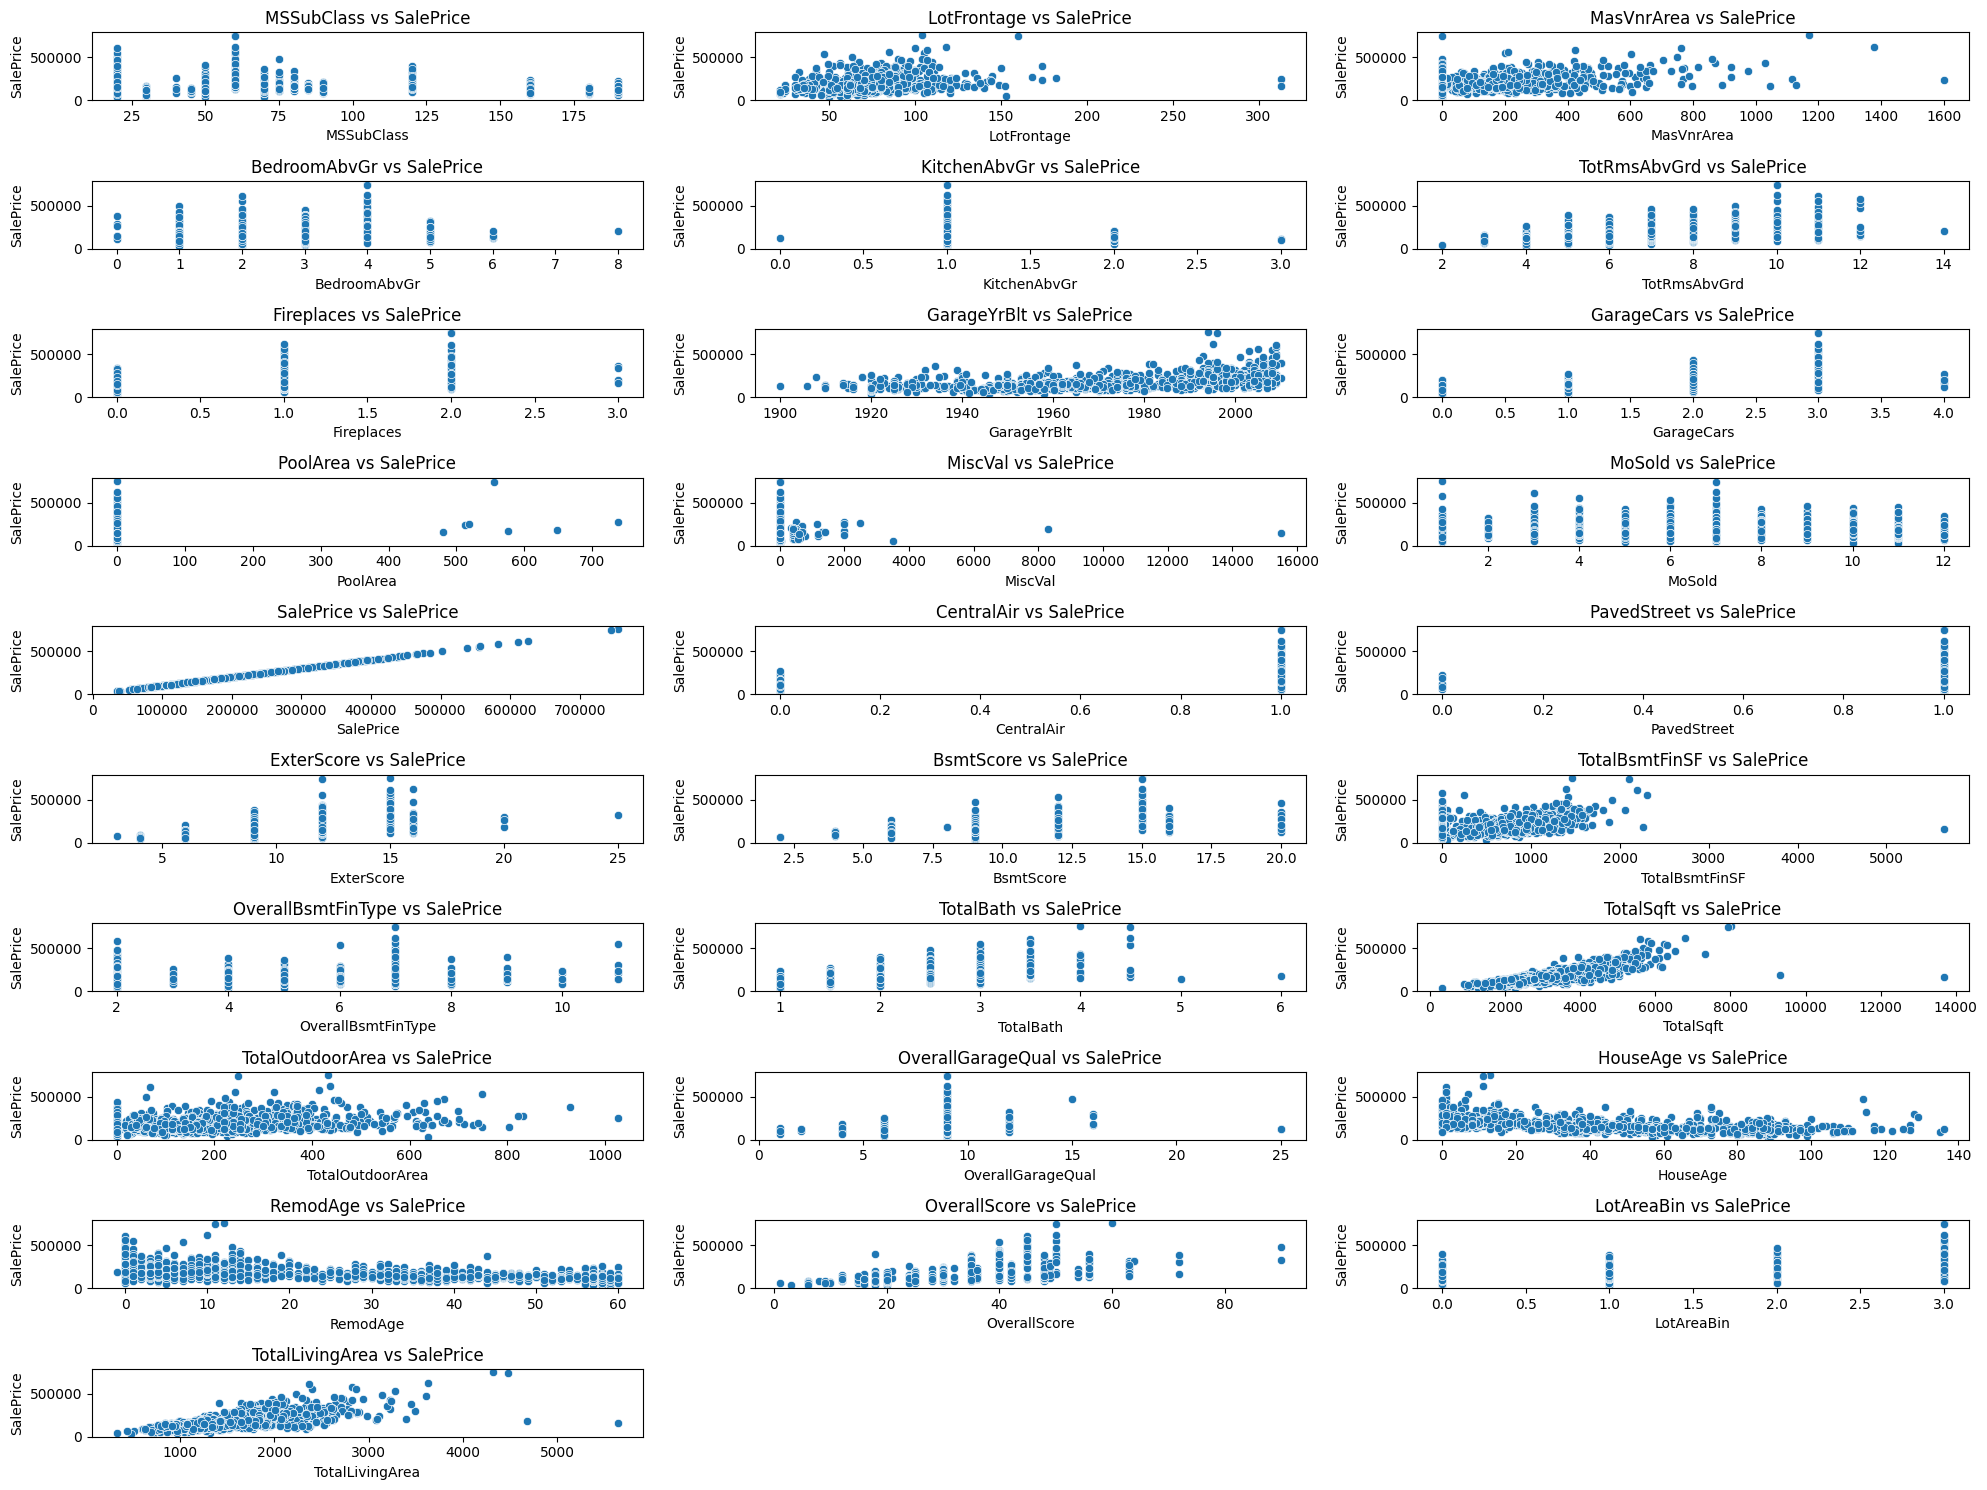

In [870]:
target_variable = 'SalePrice'

# Plot scatter plots for all numerical features against the target variable (to check for linearity and nonlinearity)
plt.figure(figsize=(20, 15))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(len(numerical_features)//3 + 1, 3, i)
    sns.scatterplot(data=data_cleaned, x=feature, y=target_variable)
    plt.title(f'{feature} vs {target_variable}')

plt.tight_layout()
plt.show()


In [45]:
! pip install category_encoders

# Data Preprocessing

## Data Cleaning

In [89]:
def handle_missing_values(df, target_column):
    if target_column not in df.columns:
        raise KeyError(f"'{target_column}' not found in DataFrame")
    
    # Separating features and target
    X = df.drop(columns=[target_column])
    y = df[target_column]
    
    # Splitting the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Splitting the training data into numerical and categorical features
    numerical_features_train = X_train.select_dtypes(include=['float64', 'int64'])
    categorical_features_train = X_train.select_dtypes(include=['object'])
    
    # Applying KNNImputer on the numerical features in the training set
    knn_imputer = KNNImputer(n_neighbors=7)
    numerical_imputed_train = pd.DataFrame(knn_imputer.fit_transform(numerical_features_train), columns=numerical_features_train.columns, index=numerical_features_train.index)
    
    # Applying SimpleImputer on the categorical features in the training set
    simple_imputer = SimpleImputer(strategy='most_frequent')
    categorical_imputed_train = pd.DataFrame(simple_imputer.fit_transform(categorical_features_train), columns=categorical_features_train.columns, index=categorical_features_train.index)
    
    # Concatenating the imputed numerical and categorical features
    X_train_cleaned = pd.concat([numerical_imputed_train, categorical_imputed_train], axis=1)
    
    # Repeating the same process for the test set
    numerical_features_test = X_test.select_dtypes(include=['float64', 'int64'])
    categorical_features_test = X_test.select_dtypes(include=['object'])
    
    numerical_imputed_test = pd.DataFrame(knn_imputer.transform(numerical_features_test), columns=numerical_features_test.columns, index=numerical_features_test.index)
    categorical_imputed_test = pd.DataFrame(simple_imputer.transform(categorical_features_test), columns=categorical_features_test.columns, index=categorical_features_test.index)
    
    X_test_cleaned = pd.concat([numerical_imputed_test, categorical_imputed_test], axis=1)
    
    return X_train_cleaned, X_test_cleaned, y_train, y_test


## Feature Engineering

In [90]:
def feature_engineering(data):
    data_cleaned = data.copy()

    # Binarization (0 and 1)
    data_cleaned['PavedStreet'] = data_cleaned['Street'].apply(lambda x: 1 if x == 'Pave' else 0)

    # Exterior Score feature
    data_cleaned['ExterScore'] = data_cleaned['ExterQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1}) * \
                       data_cleaned['ExterCond'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1})

    # Drop the original columns
    data_cleaned = data_cleaned.drop(columns=['ExterQual', 'ExterCond'])

    # Basement score feature
    data_cleaned['BsmtScore'] = data_cleaned['BsmtQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0}) * \
                      data_cleaned['BsmtCond'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0})

    # Drop the original columns
    data_cleaned = data_cleaned.drop(columns=['BsmtQual', 'BsmtCond'])

    # Total basement finished area
    data_cleaned['TotalBsmtFinSF'] = data_cleaned['BsmtFinSF1'] + data_cleaned['BsmtFinSF2']

    # Drop the original columns
    data_cleaned = data_cleaned.drop(columns=['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF'])
    
    # Overall basement type
    fin_type_map = {'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1, 'NA': 0}
    data_cleaned['OverallBsmtFinType'] = data_cleaned['BsmtFinType1'].map(fin_type_map) + data_cleaned['BsmtFinType2'].map(fin_type_map)
    # Drop the original columns
    data_cleaned = data_cleaned.drop(columns=['BsmtFinType1', 'BsmtFinType2'])
    
    # Aggregating all types of bathrooms into a single feature
    data_cleaned['TotalBath'] = data_cleaned['FullBath'] + 0.5 * data_cleaned['HalfBath'] + data_cleaned['BsmtFullBath'] + 0.5 * data_cleaned['BsmtHalfBath']

    # Drop the original columns
    data_cleaned = data_cleaned.drop(columns=['FullBath', 'HalfBath', 'BsmtFullBath', 'BsmtHalfBath'])

    # Converting CentralAir to numeric feature
    data_cleaned['CentralAir'] = data_cleaned['CentralAir'].map({'Y': 1, 'N': 0})

    # Total Square Footage
    data_cleaned['TotalSqft'] = data_cleaned['GrLivArea'] + data_cleaned['TotalBsmtSF'] + data_cleaned['GarageArea'] + data_cleaned['WoodDeckSF'] + data_cleaned['OpenPorchSF']

    # Total Outdoor Area
    data_cleaned['TotalOutdoorArea'] = data_cleaned['WoodDeckSF'] + data_cleaned['OpenPorchSF'] + data_cleaned['EnclosedPorch'] + data_cleaned['3SsnPorch'] + data_cleaned['ScreenPorch']

    # Dropping the original features
    data_cleaned = data_cleaned.drop(columns=['GrLivArea', 'TotalBsmtSF', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
                                              'EnclosedPorch', '3SsnPorch', 'ScreenPorch'])

    # Garage Features
    data_cleaned['OverallGarageQual'] = data_cleaned['GarageQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0}) * \
                       data_cleaned['GarageCond'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0})

    # Dropping the original columns
    data_cleaned = data_cleaned.drop(columns=['GarageQual', 'GarageCond'])

    # House Age and Remodel Age
    data_cleaned['HouseAge'] = data_cleaned['YrSold'] - data_cleaned['YearBuilt']
    data_cleaned['RemodAge'] = data_cleaned['YrSold'] - data_cleaned['YearRemodAdd']

    # Dropping the original columns
    data_cleaned = data_cleaned.drop(columns=['YearBuilt', 'YrSold', 'YearRemodAdd'])

    # Combining OverallQual and OverallCond
    data_cleaned['OverallScore'] = data_cleaned['OverallQual'] * data_cleaned['OverallCond']

    # Dropping the original columns
    data_cleaned = data_cleaned.drop(columns=['OverallQual', 'OverallCond'])

    # Binning the LotArea into quantiles
    data_cleaned['LotAreaBin'] = pd.qcut(data_cleaned['LotArea'], 4, labels=False)
    data_cleaned = data_cleaned.drop(columns=['LotArea'])

    # Total Living Area
    data_cleaned['TotalLivingArea'] = data_cleaned['1stFlrSF'] + data_cleaned['2ndFlrSF'] + data_cleaned['LowQualFinSF']

    # Dropping the original features
    data_cleaned = data_cleaned.drop(columns=['1stFlrSF', '2ndFlrSF', 'LowQualFinSF'])

    return data_cleaned

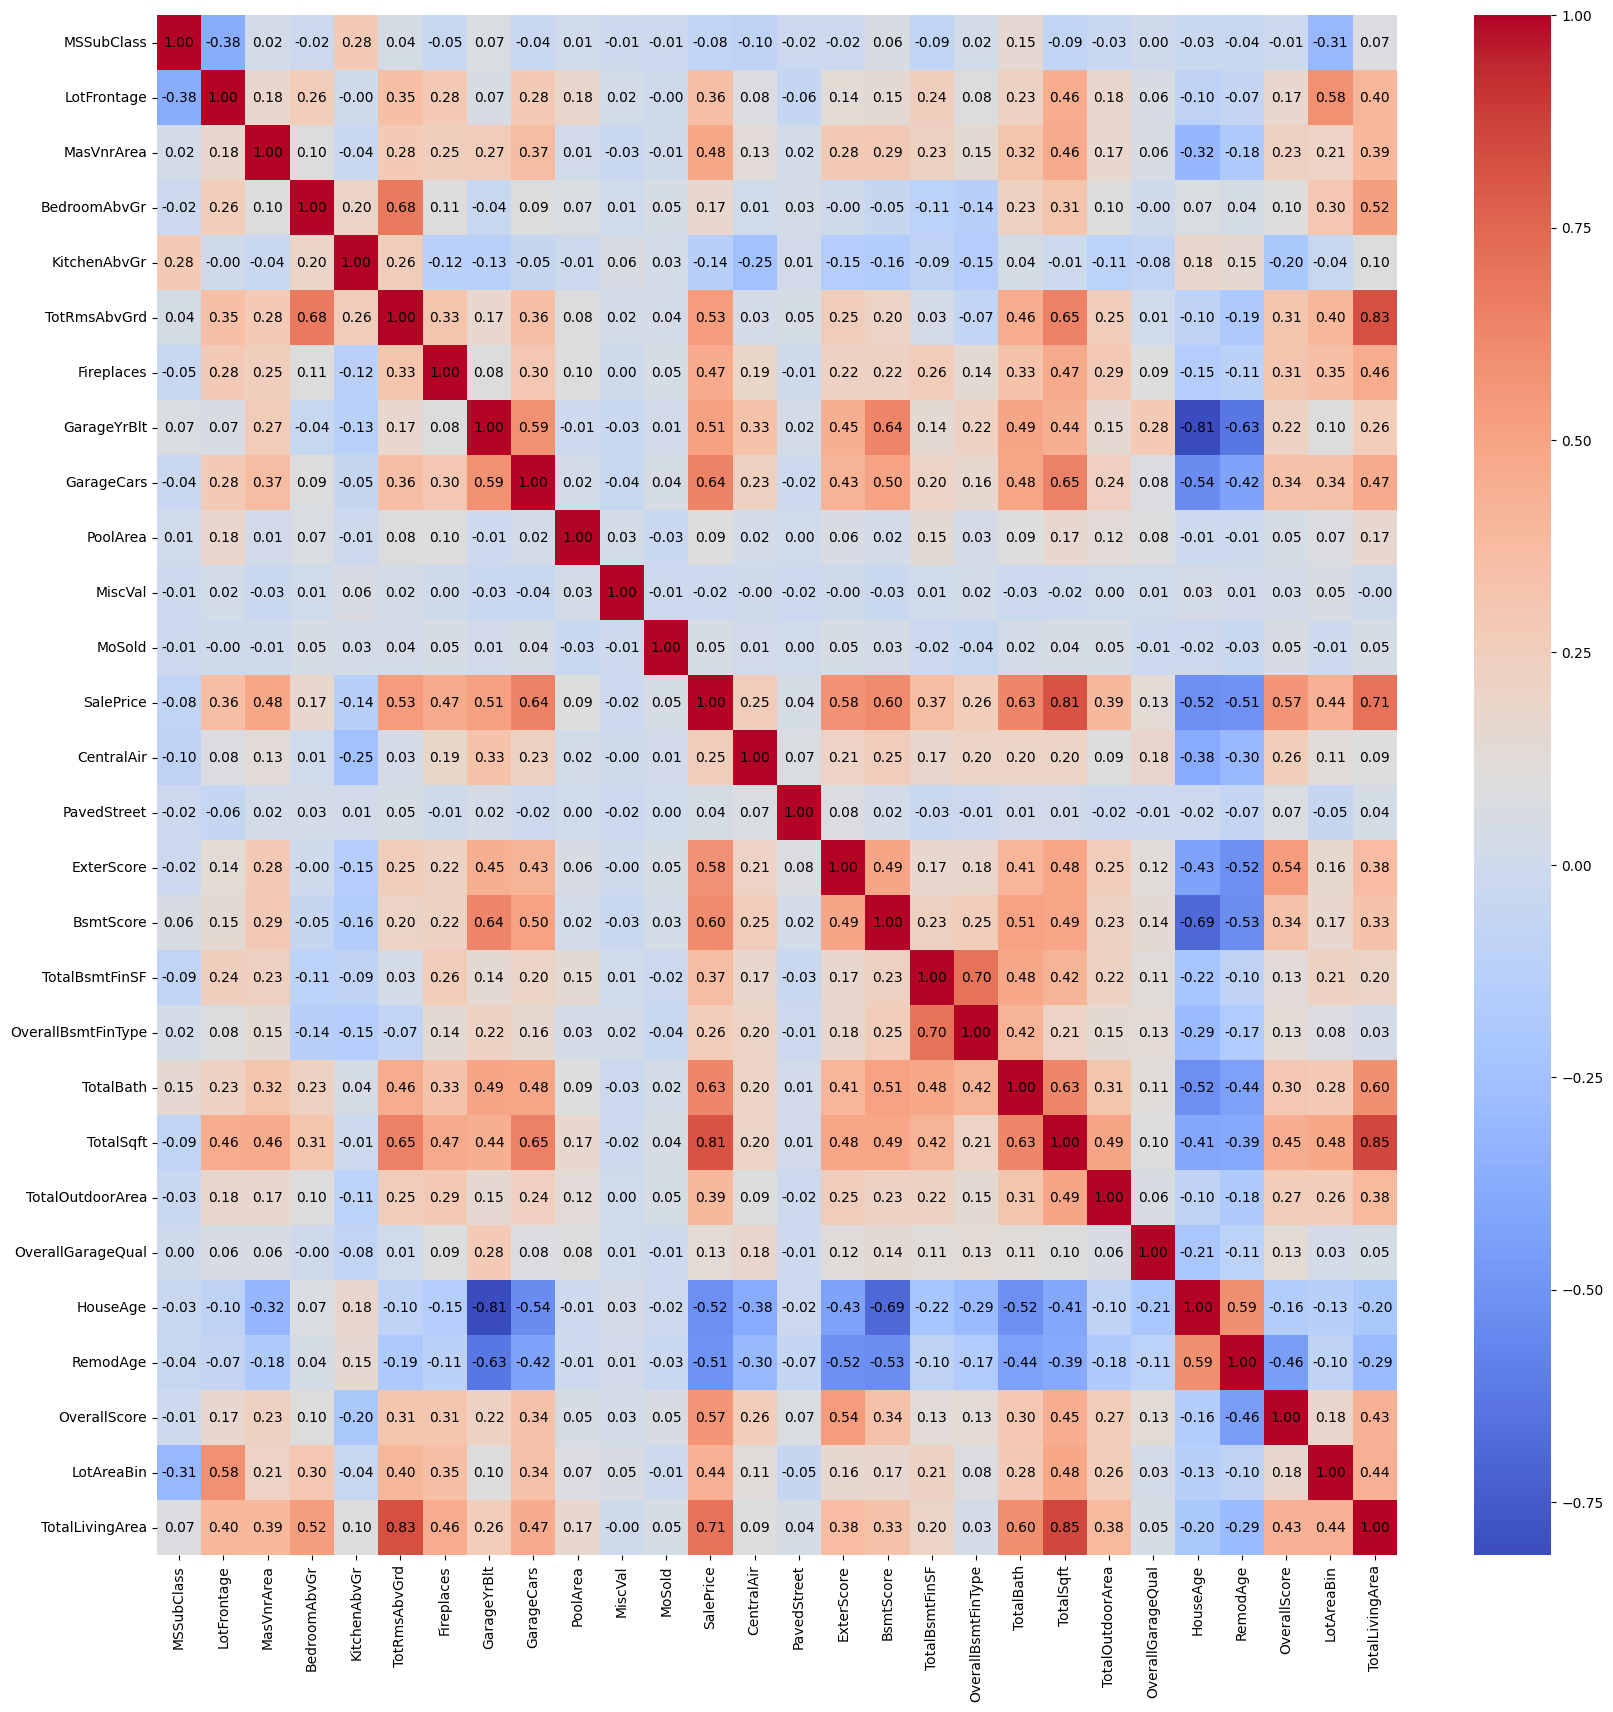

In [871]:
# Calculate the correlation matrix
corr_matrix = data_cleaned.corr()

plt.figure(figsize=(20, 20))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', cbar=True)

# Annotate the heatmap with correlation values
for i in range(corr_matrix.shape[0]):
    for j in range(corr_matrix.shape[1]):
        plt.text(j + 0.5, i + 0.5, f'{corr_matrix.iloc[i, j]:.2f}',
                 ha='center', va='center', color='black')

plt.show()

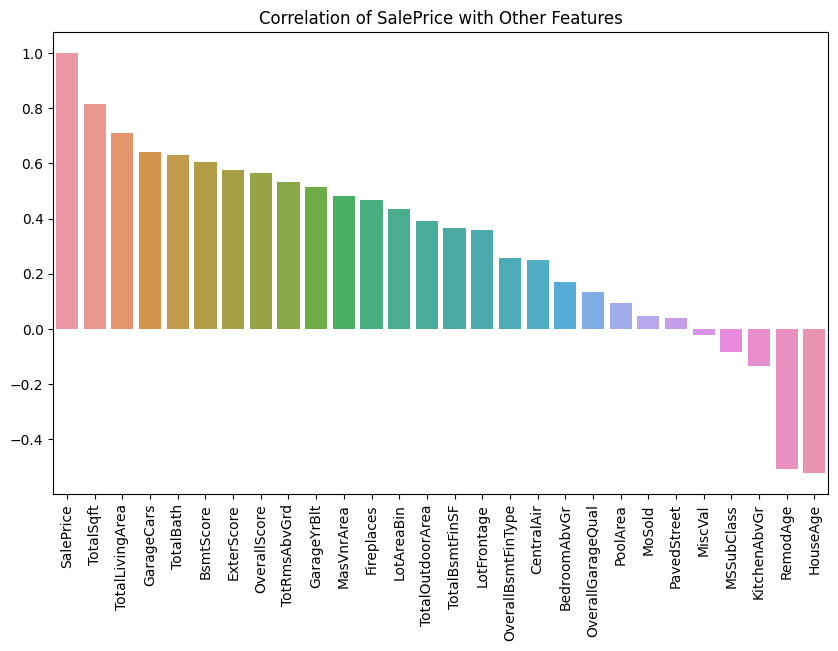

In [872]:
# Displaying the relationship between the target variable and other features
plt.figure(figsize=(10, 6))
saleprice_corr = corr_matrix['SalePrice'].sort_values(ascending=False)
sns.barplot(x=saleprice_corr.index, y=saleprice_corr.values)
plt.xticks(rotation=90)
plt.title('Correlation of SalePrice with Other Features')
plt.show()

## Encoding

In [91]:

def custom_encode_features_with_target_encoding(df, target_column):
    if target_column not in df.columns:
        raise KeyError(f"'{target_column}' not found in DataFrame")
    
    ordinal_mapping = {
        'LotShape': ['Reg', 'IR1', 'IR2', 'IR3'],
        'LandSlope': ['Gtl', 'Mod', 'Sev'],
        'BsmtExposure': ['No', 'Mn', 'Av', 'Gd'],
        'HeatingQC': ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
        'KitchenQual': ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
        'Functional': ['Sal', 'Sev', 'Maj2', 'Maj1', 'Mod', 'Min2', 'Min1', 'Typ'],
        'GarageFinish': ['Unf', 'RFn', 'Fin'],
        'PavedDrive': ['N', 'P', 'Y'],
        'Utilities': ['ELO', 'NoSeWa', 'NoSewr', 'AllPub']
    }

    # Applying Ordinal Encoding
    ordinal_encoder = OrdinalEncoder(categories=[ordinal_mapping[feature] for feature in ordinal_mapping.keys()])
    ordinal_encoded_columns = ordinal_encoder.fit_transform(df[list(ordinal_mapping.keys())])
    df[list(ordinal_mapping.keys())] = ordinal_encoded_columns

    # Applying Target Encoding for Nominal Features
    nominal_features = [
        'MSZoning', 'Street', 'LandContour', 'LotConfig', 'Neighborhood',
        'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle',
        'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation',
        'Heating', 'Electrical', 'GarageType', 'SaleType', 'SaleCondition'
    ]

    target_encoder = ce.TargetEncoder(cols=nominal_features)
    df = target_encoder.fit_transform(df, df[target_column])
    df[target_column] = np.log1p(df[target_column])

    return df


## Polynomial Features

In [92]:

def apply_polynomial_features(X_train, X_test, poly_features, degree=2):
    
    poly = PolynomialFeatures(degree=degree, include_bias=False)
    
    # Applying polynomial transformation to selected features
    X_train_poly = X_train.copy()
    X_test_poly = X_test.copy()
    
    # Transforming and concatenate polynomial features
    poly_train = poly.fit_transform(X_train[poly_features])
    poly_test = poly.transform(X_test[poly_features])
    
    # Concatenating original and polynomial features
    X_train_combined = np.hstack((X_train.drop(columns=poly_features), poly_train))
    X_test_combined = np.hstack((X_test.drop(columns=poly_features), poly_test))
    
    return X_train_combined, X_test_combined


## Modeling

### 1.Lasso Regression

In [96]:
# Function for Training and Evaluating with Lasso regression 
def train_and_evaluate_with_lasso(X_train, X_test, y_train, y_test, alpha=1.0):
    # Feature Scaling
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Model Training
    model = Lasso(alpha=alpha)
    model.fit(X_train_scaled, y_train)

    # Model Evaluation
    y_pred_train = model.predict(X_train_scaled)
    y_pred_test = model.predict(X_test_scaled)

    train_r2 = r2_score(y_train, y_pred_train)
    test_r2 = r2_score(y_test, y_pred_test)
    train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
    
    return model, train_r2, test_r2, train_rmse, test_rmse



### 2.Decision Tree

In [97]:
# Function for Training and Evaluating with Decision Tree
def train_and_evaluate_with_decision_tree(X_train, X_test, y_train, y_test, max_depth=25):
    # Feature Scaling
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Model Training
    model = DecisionTreeRegressor(max_depth=max_depth, random_state=42)
    model.fit(X_train_scaled, y_train)

    # Model Evaluation
    y_pred_train = model.predict(X_train_scaled)
    y_pred_test = model.predict(X_test_scaled)

    train_r2 = r2_score(y_train, y_pred_train)
    test_r2 = r2_score(y_test, y_pred_test)
    train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))

    return model, train_r2, test_r2, train_rmse, test_rmse



### 3.Random Forest

In [98]:
# Function for Training and Evaluating with Random Forest
def train_and_evaluate_with_random_forest(X_train, X_test, y_train, y_test, n_estimators=5):
    # Feature Scaling
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Model Training
    model = RandomForestRegressor(n_estimators=n_estimators, random_state=42)
    model.fit(X_train_scaled, y_train)

    # Model Evaluation
    y_pred_train = model.predict(X_train_scaled)
    y_pred_test = model.predict(X_test_scaled)

    train_r2 = r2_score(y_train, y_pred_train)
    test_r2 = r2_score(y_test, y_pred_test)
    train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))

    return model, train_r2, test_r2, train_rmse, test_rmse





C:\Users\laphouse\Documents\NetBeansProjects\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.205e+10, tolerance: 6.967e+08
  model = cd_fast.enet_coordinate_descent(


Lasso Regression - R-squared (Training): 0.9725, R-squared (Testing): 0.8502
Lasso Regression - RMSE (Training): 12809.9480, RMSE (Testing): 33891.4868
Decision Tree - R-squared (Training): 0.9975, R-squared (Testing): 0.9932
Decision Tree - RMSE (Training): 3838.9597, RMSE (Testing): 7232.0954
Random Forest - R-squared (Training): 0.9992, R-squared (Testing): 0.9939
Random Forest - RMSE (Training): 2152.0785, RMSE (Testing): 6813.1984


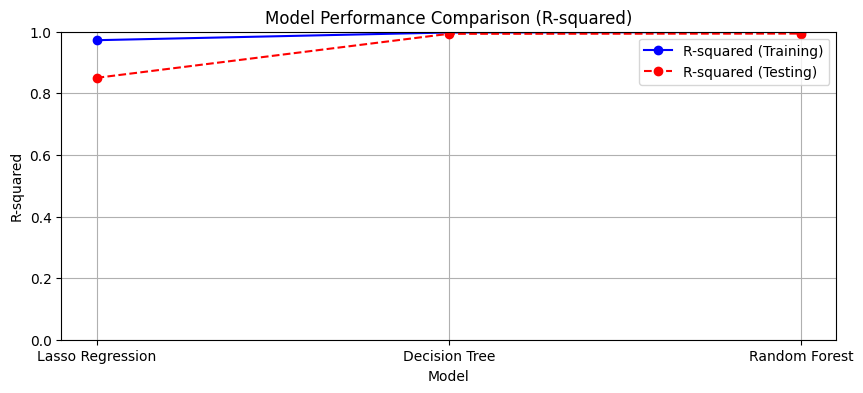

In [99]:
target_column = 'SalePrice'
poly_features = [
    'OverallScore', 'TotalLivingArea', 'TotalBath', 'TotalBsmtFinSF', 'HouseAge', 
    'OverallGarageQual', 'PavedStreet', 'RemodAge', 'GarageYrBlt', 'TotalSqft', 'TotalOutdoorArea'
]

# Handling missing values
X_train_cleaned, X_test_cleaned, y_train, y_test = handle_missing_values(df_cleaned, target_column)

# Feature engineering
X_train_fe = feature_engineering(X_train_cleaned)
X_test_fe = feature_engineering(X_test_cleaned)

X_train_fe[target_column] = y_train
X_test_fe[target_column] = y_test

# Feature encoding
X_train_encoded = custom_encode_features_with_target_encoding(X_train_fe, target_column)
X_test_encoded = custom_encode_features_with_target_encoding(X_test_fe, target_column)

# Applying Polynomial Features and concatenating with original features
X_train_combined, X_test_combined = apply_polynomial_features(X_train_encoded, X_test_encoded, poly_features, degree=2)

# Training and evaluating with Lasso Regression
lasso_model, lasso_train_r2, lasso_test_r2, lasso_train_rmse, lasso_test_rmse = train_and_evaluate_with_lasso(X_train_combined, X_test_combined, y_train, y_test, alpha=1.0)
print(f'Lasso Regression - R-squared (Training): {lasso_train_r2:.4f}, R-squared (Testing): {lasso_test_r2:.4f}')
print(f'Lasso Regression - RMSE (Training): {lasso_train_rmse:.4f}, RMSE (Testing): {lasso_test_rmse:.4f}')

# Training and evaluating with Decision Tree
dt_model, dt_train_r2, dt_test_r2, dt_train_rmse, dt_test_rmse = train_and_evaluate_with_decision_tree(X_train_combined, X_test_combined, y_train, y_test, max_depth=5)
print(f'Decision Tree - R-squared (Training): {dt_train_r2:.4f}, R-squared (Testing): {dt_test_r2:.4f}')
print(f'Decision Tree - RMSE (Training): {dt_train_rmse:.4f}, RMSE (Testing): {dt_test_rmse:.4f}')

# Training and evaluating with Random Forest
rf_model, rf_train_r2, rf_test_r2, rf_train_rmse, rf_test_rmse = train_and_evaluate_with_random_forest(X_train_combined, X_test_combined, y_train, y_test, n_estimators=25)
print(f'Random Forest - R-squared (Training): {rf_train_r2:.4f}, R-squared (Testing): {rf_test_r2:.4f}')
print(f'Random Forest - RMSE (Training): {rf_train_rmse:.4f}, RMSE (Testing): {rf_test_rmse:.4f}')


# Plotting the R-squared values
model_names = ['Lasso Regression', 'Decision Tree', 'Random Forest']
train_r2_scores = [lasso_train_r2, dt_train_r2, rf_train_r2]
test_r2_scores = [lasso_test_r2, dt_test_r2, rf_test_r2]

plt.figure(figsize=(10, 4))
plt.plot(model_names, train_r2_scores, marker='o', linestyle='-', color='b', label='R-squared (Training)')
plt.plot(model_names, test_r2_scores, marker='o', linestyle='--', color='r', label='R-squared (Testing)')

plt.title('Model Performance Comparison (R-squared)')
plt.xlabel('Model')
plt.ylabel('R-squared')
plt.ylim(0, 1)  
plt.grid(True)
plt.legend()
plt.show()

### Problem Observation
We observed a decrease in model accuracy after handling the outliers using some techniques like:
- Z-Score (imputing with median)
- IQR (imputing with median)
- Winsorization

And addressing multicollinearity. Specifically:
- **R-squared decreased from 0.89 to 0.79**
- **Mean Squared Error increased from 0.01 to 0.03**

And that might indicate that:
1. **Loss of Important Features:** Dropping features due to multicollinearity might have removed variables that were significant predictors.
2. **Data Distortion:** while reducing the outlier influence, the methods used might have altered the distribution of feature values, impacting model performance.


**Outliers:**
- In some cases, outliers can contain valuable information about rare but important patterns in the data. If these outliers are removed or altered, we might lose this signal, leading to lower model performance.
- Outliers might represent rare but critical events or observations that are essential for accurate predictions.
- Replacing outliers with the median or another statistic might oversimplify the data and mask underlying trends or relationships.
- Handling outliers might reduce the variance in the dataset, potentially leading to a model that doesn’t capture the full complexity of the data.
- Outlier handling can alter the distribution of features, which might not align with the assumptions of certain models or might require re-tuning of model hyperparameters.


**Multicolinearity:**
- Features with multicollinearity might still carry significant information, and dropping them could result in loss of valuable predictive power.
-  Removing features due to multicollinearity might affect the ability of the model to capture interactions between features. Sometimes, complex interactions are better modeled when correlated features are retained.
